In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def GetSample(N = int(1e4), ncoins=3, weights=None):
    
    Sample = np.zeros((N,ncoins))
    
    Events = [0,1]
    
    for i in range(N):
        
        if weights == None:
            Exp = np.random.choice( Events, ncoins )
        else:
            Exp = np.random.choice( Events, ncoins, p= weights )
            
        
        Sample[i] = Exp
        
    return Sample

In [28]:
N = 10000
ncoins = 10
Sample = GetSample(N,ncoins=ncoins,weights=[0.5,0.5])

In [23]:
Sample

array([[1., 0., 1., ..., 0., 1., 1.],
       [0., 1., 1., ..., 1., 1., 0.],
       [0., 0., 1., ..., 0., 1., 1.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 0., 1.]])

In [24]:
Frecuencias = np.array([], dtype = np.int64)

for i in range(Sample.shape[0]):
    
    NCaras  = 0
    
    for j in range(Sample.shape[1]):
        
        if Sample[i,j] == 0:
            NCaras += 1 
            
    Frecuencias = np.append(Frecuencias,NCaras)

In [25]:
Frecuencias

array([5, 5, 6, ..., 5, 3, 4])

# Calculamos probabilidad

In [30]:
ii = np.where( Frecuencias == 2)
Events = len(Frecuencias[ii])
print(Events, Events/N, 3/8)

466 0.0466 0.375


# Histograma

In [31]:
bins = np.linspace(0,ncoins+1,ncoins+2)
bins

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [32]:
H,bines = np.histogram(Frecuencias,bins=bins)
w = np.diff(bines)
# Marcas de clase
m = bines[:-1]

In [33]:
H

array([   4,  106,  466, 1197, 1990, 2455, 2017, 1160,  498,   91,   16])

In [34]:
HNorm = H / np.sum(H*w)

In [35]:
HNorm

array([0.0004, 0.0106, 0.0466, 0.1197, 0.199 , 0.2455, 0.2017, 0.116 ,
       0.0498, 0.0091, 0.0016])

In [36]:
m

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

<BarContainer object of 11 artists>

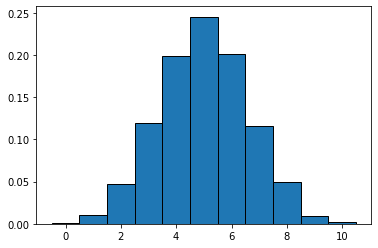

In [37]:
plt.bar(m,HNorm,width=w,ec='k')

In [38]:
# Valor medio
xbar = np.sum(m*HNorm)
xbar

5.0049

In [39]:
# Varianza
Var = np.sum( (m-xbar)**2*HNorm  )
Var

2.57627599

In [40]:
# Desviacion estandar
std = np.sqrt(Var)
std

1.605078188126672

In [41]:
# Tercer momento
x3 = np.sum( (m-xbar)**3 * HNorm ) 

In [42]:
# Coeficiente de asimetria de Fisher
gamma = x3/std**3
gamma

0.01828932288759043

In [43]:
#Curtosis
x4 = np.sum( (m-xbar)**4 * HNorm ) 
x4

18.27164654004856

In [44]:
# Coeficiente de Curtosis
gamma2 = x4/std**4 - 3
gamma2

-0.2470842960647226